In [1]:
#Python packages
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 400)
import re
from scipy import stats

#Visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#ML modeling packages
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [2]:
train = pd.read_pickle('train.pkl')

In [2]:
# train = pd.read_csv('train_scaled.csv', index_col=0)

In [2]:
# train_num = pd.read_csv('train_scaled.csv', index_col=0)

In [3]:
train.head()

,building_id,meter_reading,site_id,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,sea_level_pressure,wind_direction,wind_speed,hour,day,weekday,month,day_of_year,wind_chill,heat_index,feels,radiation,altitude,solar_spec,random,age,air_temperature_mean_lag3,air_temperature_max_lag3,dew_temperature_mean_lag3,sea_level_pressure_mean_lag3,wind_direction_mean_lag3,wind_speed_mean_lag3,air_temperature_mean_lag72,air_temperature_max_lag72,air_temperature_min_lag72,air_temperature_std_lag72,cloud_coverage_mean_lag72,dew_temperature_mean_lag72,precip_depth_1_hr_mean_lag72,sea_level_pressure_mean_lag72,wind_direction_mean_lag72,wind_speed_mean_lag72,month_roc,hour_roc,meter,primary_use
0,-1.872070,-1.924805,-1.567383,0.324219,1.251953,-0.458008,0.195679,0.888672,0.241455,0.261719,-0.276611,0.044464,-1.662109,-1.673828,0.497314,-1.623047,-1.456055,0.320068,0.293701,0.293213,1.405273,0.128784,-2.013672,-1.674805,1.146484,0.195923,0.195801,0.241821,0.261475,-0.279053,0.043915,0.203979,0.200684,0.207153,-16.312500,0.827637,0.256104,-2.117188,0.251221,-0.368408,0.026428,-0.967773,0.056122,0,Education
1,-1.870117,-1.924805,-1.567383,0.071411,1.249023,-0.458008,0.195679,0.888672,0.241455,0.261719,-0.276611,0.044464,-1.662109,-1.673828,0.497314,-1.623047,-1.456055,0.320068,0.293701,0.293213,1.405273,0.128784,-2.013672,-1.419922,1.154297,0.195923,0.195801,0.241821,0.261475,-0.279053,0.043915,0.203979,0.200684,0.207153,0.058777,0.827637,0.256104,-2.117188,0.251221,-0.368408,0.026428,-0.967773,0.056122,0,Education
2,-1.867188,-1.924805,-1.567383,0.213989,1.240234,-0.458008,0.195679,0.888672,0.241455,0.261719,-0.276611,0.044464,-1.662109,-1.673828,0.497314,-1.623047,-1.456055,0.320068,0.293701,0.293213,1.405273,0.128784,-2.013672,-0.001800,1.179688,0.195923,0.195801,0.241821,0.261475,-0.279053,0.043915,0.203979,0.200684,0.207153,0.058777,0.827637,0.256104,-2.117188,0.251221,-0.368408,0.026428,-0.967773,0.056122,0,Education
3,-1.865234,-1.924805,-1.567383,1.196289,1.248047,-0.458008,0.195679,0.888672,0.241455,0.261719,-0.276611,0.044464,-1.662109,-1.673828,0.497314,-1.623047,-1.456055,0.320068,0.293701,0.293213,1.405273,0.128784,-2.013672,-0.288330,1.158203,0.195923,0.195801,0.241821,0.261475,-0.279053,0.043915,0.203979,0.200684,0.207153,0.058777,0.827637,0.256104,-2.117188,0.251221,-0.368408,0.026428,-0.967773,0.056122,0,Education
4,-1.863281,-1.924805,-1.567383,-0.851074,1.229492,-0.458008,0.195679,0.888672,0.241455,0.261719,-0.276611,0.044464,-1.662109,-1.673828,0.497314,-1.623047,-1.456055,0.320068,0.293701,0.293213,1.405273,0.128784,-2.013672,-1.710938,1.210938,0.195923,0.195801,0.241821,0.261475,-0.279053,0.043915,0.203979,0.200684,0.207153,0.058777,0.827637,0.256104,-2.117188,0.251221,-0.368408,0.026428,-0.967773,0.056122,0,Education


In [8]:
train.groupby('site_id').apply(lambda group: group.isna().sum())

,building_id,meter,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,sea_level_pressure,wind_direction,wind_speed,hour,day,weekday,month,day_of_year,wind_chill,heat_index,feels,radiation,altitude,solar_spec,random,age,air_temperature_mean_lag3,air_temperature_max_lag3,cloud_coverage_std_lag3,dew_temperature_mean_lag3,sea_level_pressure_mean_lag3,wind_direction_mean_lag3,wind_speed_mean_lag3,air_temperature_mean_lag72,air_temperature_max_lag72,air_temperature_min_lag72,air_temperature_std_lag72,cloud_coverage_mean_lag72,dew_temperature_mean_lag72,precip_depth_1_hr_mean_lag72,sea_level_pressure_mean_lag72,wind_direction_mean_lag72,wind_speed_mean_lag72,month_roc,hour_roc
site_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,1076663,309,467404,309,10295,31250,0,0,0,0,0,0,0,0,0,0,10295,10399,0,0,5005,5005,471353,5100,64898,75799,7845,3559,3559,3559,3586,432927,3572,194480,59930,60221,5543,0,0
1,0,0,0,0,0,0,140530,0,1386,446202,1386,4599,1512,1323,0,0,0,0,0,1323,0,0,0,4599,553357,0,140530,2648,2648,241504,2723,32725,39135,4115,1902,1902,1902,1917,221962,1949,99707,29802,30319,2837,0,0
2,0,0,0,0,0,0,581932,2530312,575,678564,575,12955,170488,1726,0,0,0,0,0,1726,0,0,0,12955,30497,0,581932,10954,10954,1096023,11436,148937,183213,17397,8867,8867,8867,8918,1007380,9155,453137,137470,145998,13141,0,0
3,0,0,0,0,0,0,1236835,2370097,2167,983668,2707,43666,42353,2167,0,0,0,0,0,2167,0,0,0,43666,53407,0,1236835,11777,11777,1031192,12353,140743,171094,17071,8971,8971,8971,9024,948733,9303,426653,128682,134844,12777,0,0
4,0,0,0,0,0,0,9795,0,82,359086,254,6325,8995,82,0,0,0,0,0,82,0,0,0,6325,117460,0,9795,4143,4143,326730,4309,46482,54509,5844,2926,2926,2926,2959,301007,3056,137395,42131,42496,4171,0,0
5,0,0,0,0,0,0,8784,0,2759,539251,2759,781776,28836,2848,0,0,0,0,0,2848,0,0,0,781776,781776,0,8784,4278,4278,342959,4430,47840,57456,6095,3251,3251,3251,3271,314256,3311,141642,44587,45155,4407,0,0
6,0,0,0,0,0,0,668133,668133,929,227722,929,13290,59292,3188,0,0,0,0,0,3188,0,0,0,13290,13290,0,668133,3503,3503,292132,3656,41561,48275,4959,2691,2691,2691,2713,270223,2768,121304,38278,38338,3737,0,0
7,0,0,0,0,0,0,25974,0,7039,366681,8005,7375,7039,7039,0,0,0,0,0,7039,0,0,0,7375,336134,0,25974,1866,1866,160090,1911,22100,26406,2680,1454,1454,1454,1459,148049,1495,66831,20129,20260,1970,0,0
8,0,0,0,0,0,0,567915,0,207,250570,207,5534,16237,0,0,0,0,0,0,0,0,0,0,5534,5602,0,567915,2517,2517,249531,2534,34417,37013,3458,2016,2016,2016,2027,229016,2033,100983,32057,28983,2678,0,0


In [34]:
train.describe()

,building_id,meter_reading,site_id,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,sea_level_pressure,wind_direction,wind_speed,hour,day,weekday,month,day_of_year,wind_chill,heat_index,feels,radiation,altitude,solar_spec,random,age,air_temperature_mean_lag3,air_temperature_max_lag3,cloud_coverage_std_lag3,dew_temperature_mean_lag3,sea_level_pressure_mean_lag3,wind_direction_mean_lag3,wind_speed_mean_lag3,air_temperature_mean_lag72,air_temperature_max_lag72,air_temperature_min_lag72,air_temperature_std_lag72,cloud_coverage_mean_lag72,dew_temperature_mean_lag72,precip_depth_1_hr_mean_lag72,sea_level_pressure_mean_lag72,wind_direction_mean_lag72,wind_speed_mean_lag72,month_roc,hour_roc
count,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,8088456.0,3506933.0,2.011944e+07,11390736.0,2.011596e+07,18984432.0,18767053.0,2.007242e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.007242e+07,20216101.00,20216101.00,20216101.0,1.898443e+07,1.621740e+07,2.021610e+07,8088456.0,2.012022e+07,2.012022e+07,1.139073e+07,2.011684e+07,18987438.0,1.877634e+07,2.007369e+07,2.014089e+07,2.014089e+07,2.014089e+07,2.014040e+07,1.209410e+07,2.013918e+07,16527583.0,19081169.0,1.908087e+07,2.010922e+07,2.021610e+07,2.021610e+07
mean,7.992780e+02,NaN,7.992232e+00,1.390013e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.150232e+01,1.576123e+01,3.006958e+00,6.578453e+00,1.065099e+02,NaN,-inf,-inf,NaN,NaN,NaN,4.993934e+02,NaN,NaN,NaN,2.876282e-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.269133e+02,0.000000e+00,5.099061e+00,1.863197e+04,NaN,0.0,0.000000e+00,0.0,0.000000e+00,NaN,NaN,0.000000e+00,6.922018e+00,8.820535e+00,1.997191e+00,3.436662e+00,7.246344e+01,NaN,NaN,NaN,NaN,NaN,0.000000e+00,2.887016e+02,0.0,0.000000e+00,0.000000e+00,6.567383e-02,0.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-3.269500e+04,1900.0,1.0,-2.890625e+01,0.0,-3.500000e+01,968.0,0.0,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-4.456250e+01,-inf,-inf,1320.0,-2.690000e+02,6.757812e-01,0.000000e+00,-1.0,-2.890625e+01,-2.890625e+01,0.000000e+00,-3.500000e+01,968.0,0.000000e+00,0.000000e+00,-2.890625e+01,-2.890625e+01,-2.890625e+01,0.000000e+00,0.000000e+00,-3.487500e+01,-1.0,968.5,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.930000e+02,2.943359e+00,3.000000e+00,-1.491300e+04,1951.0,1.0,8.601562e+00,0.0,0.000000e+00,1011.5,70.0,2.099609e+00,6.000000e+00,8.000000e+00,1.000000e+00,4.000000e+00,4.600000e+01,4.609375e+01,43.30,42.56,1333.0,-6.006250e+01,6.757812e-01,2.490000e+02,23.0,8.601562e+00,8.601562e+00,0.000000e+00,0.000000e+00,1011.5,7.331250e+01,2.099609e+00,8.554688e+00,8.898438e+00,8.296875e+00,0.000000e+00,0.000000e+00,1.583252e-01,0.0,1011.5,8.000000e+01,2.099609e+00,2.261719e+00,3.261719e-01
50%,8.950000e+02,4.332031e+00,9.000000e+00,3.877000e+03,1969.0,3.0,1.670312e+01,0.0,8.898438e+00,1016.0,180.0,3.099609e+00,1.200000e+01,1.600000e+01,3.000000e+00,7.000000e+00,9.300000e+01,6.443750e+01,60.56,62.06,1366.0,-2.275000e+01,6.757812e-01,4.990000e+02,47.0,1.670312e+01,1.670312e+01,0.000000e+00,8.898438e+00,1016.0,1.800000e+02,3.099609e+00,1.676562e+01,1.720312e+01,1.670312e+01,4.351139e-06,1.861328e+00,8.898438e+00,0.0,1016.0,1.738750e+02,3.099609e+00,3.962891e+00,6.025391e-01
75%,1.179000e+03,5.535156e+00,1.300000e+01,1.719000e+04,1993.0,6.0,2.409375e+01,4.0,1.609375e+01,1020.5,280.0,4.601562e+00,1.800000e+01,2.300000e+01,5.000000e+00,1.000000e+01,1.650000e+02,7.893750e+01,75.56,75.00,1401.0,1.470312e+01,6.757812e-01,7.490000e+02,65.0,2.409375e+01,2.429688e+01,0.000000e+00,1.609375e+01,1020.5,2.800000e+02,4.601562e+00,2.414062e+01,2.440625e+01,2.390625e+01,2.252197e-01,4.000000e+00,1.600000e+01,0.0,1020.5,2.700000e+02,4.601562e+00,6.039062e+00,9.912109e-01
max,1.448000e+03,1.690625e+01,1.500000e+01,3.276

In [4]:
train['random'] = np.random.randint(low=0, high=10000, size=len(train))

In [5]:
train.loc[train['heat_index']==-np.inf, 'heat_index'] = -999
train.loc[train['feels']== -np.inf, 'feels'] = -999

In [6]:
train.head()

,building_id,meter,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,sea_level_pressure,wind_direction,wind_speed,hour,day,weekday,month,day_of_year,wind_chill,heat_index,feels,radiation,altitude,solar_spec,random,age,air_temperature_mean_lag3,air_temperature_max_lag3,cloud_coverage_std_lag3,dew_temperature_mean_lag3,sea_level_pressure_mean_lag3,wind_direction_mean_lag3,wind_speed_mean_lag3,air_temperature_mean_lag72,air_temperature_max_lag72,air_temperature_min_lag72,air_temperature_std_lag72,cloud_coverage_mean_lag72,dew_temperature_mean_lag72,precip_depth_1_hr_mean_lag72,sea_level_pressure_mean_lag72,wind_direction_mean_lag72,wind_speed_mean_lag72,month_roc,hour_roc
0,0,Electricity,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,1019.5,0.0,0.0,0,1,4,1,1,83.6,77.6,77.0,1414.0,-51.78,NaN,165,8.0,25.0,25.0,NaN,20.0,1019.5,0.0,0.0,25.0,25.0,25.0,NaN,6.0,20.0,NaN,1019.5,0.0,0.0,1.437,0.991
1,1,Electricity,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,1019.5,0.0,0.0,0,1,4,1,1,83.6,77.6,77.0,1414.0,-51.78,NaN,901,12.0,25.0,25.0,0.0,20.0,1019.5,0.0,0.0,25.0,25.0,25.0,0.0,6.0,20.0,NaN,1019.5,0.0,0.0,1.437,0.991
2,2,Electricity,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,1019.5,0.0,0.0,0,1,4,1,1,83.6,77.6,77.0,1414.0,-51.78,NaN,4994,25.0,25.0,25.0,0.0,20.0,1019.5,0.0,0.0,25.0,25.0,25.0,0.0,6.0,20.0,NaN,1019.5,0.0,0.0,1.437,0.991
3,3,Electricity,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,1019.5,0.0,0.0,0,1,4,1,1,83.6,77.6,77.0,1414.0,-51.78,NaN,4167,14.0,25.0,25.0,0.0,20.0,1019.5,0.0,0.0,25.0,25.0,25.0,0.0,6.0,20.0,NaN,1019.5,0.0,0.0,1.437,0.991
4,4,Electricity,0.0,0,Education,-14465,1975.0,NaN,25.0,6.0,20.0,1019.5,0.0,0.0,0,1,4,1,1,83.6,77.6,77.0,1414.0,-51.78,NaN,62,41.0,25.0,25.0,0.0,20.0,1019.5,0.0,0.0,25.0,25.0,25.0,0.0,6.0,20.0,NaN,1019.5,0.0,0.0,1.437,0.991


In [4]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object and col_type.name != 'category' and 'datetime' not in col_type.name:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        elif 'datetime' not in col_type.name:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df
train = reduce_mem_usage(train)

Memory usage of dataframe is 7094.88 MB
Memory usage after optimization is: 1850.84 MB
Decreased by 73.9%


### Pipeline to encode & Impute

In [19]:
num_attribs = train.select_dtypes(include=['int','int64','float64','float32','int32',
                                           'int16','float16','float', 'int8']).columns

In [5]:
train_num = train[num_attribs]

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
	('imputer', SimpleImputer(strategy='constant', fill_value=-999)),
	('std_scalar', StandardScaler()),
	])

train_num_f = num_pipeline.fit_transform(train_num)

In [7]:
train_scaled = pd.DataFrame(train_num_f, index=train_num.index, columns=train_num.columns)
train_scaled.isna().sum()

building_id                      0
meter_reading                    0
site_id                          0
square_feet                      0
year_built                       0
floor_count                      0
air_temperature                  0
cloud_coverage                   0
dew_temperature                  0
sea_level_pressure               0
wind_direction                   0
wind_speed                       0
hour                             0
day                              0
weekday                          0
month                            0
day_of_year                      0
wind_chill                       0
heat_index                       0
feels                            0
radiation                        0
altitude                         0
solar_spec                       0
random                           0
age                              0
air_temperature_mean_lag3        0
air_temperature_max_lag3         0
dew_temperature_mean_lag3        0
sea_level_pressure_m

In [8]:
train_scaled['meter'] = train['meter'].astype(str)

In [9]:
'''Label Encoding the "meter" column specifically so that we 
can perform LGBM on the data based on meter type'''

train_scaled.loc[train_scaled['meter']=='Electricity', 'meter']=0
train_scaled.loc[train_scaled['meter']=='ChilledWater', 'meter']=1
train_scaled.loc[train_scaled['meter']=='HotWater', 'meter']=2
train_scaled.loc[train_scaled['meter']=='Steam', 'meter']=3

In [10]:
train_scaled['primary_use'] = train['primary_use'].astype(str)

In [11]:
train_scaled.to_csv('train_scaled.csv')

In [32]:
train_scaled.head()

,building_id,meter_reading,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,sea_level_pressure,wind_direction,wind_speed,day_of_year,wind_chill,heat_index,feels,radiation,altitude,solar_spec,random,age,air_temperature_mean_lag3,air_temperature_max_lag3,dew_temperature_mean_lag3,sea_level_pressure_mean_lag3,wind_direction_mean_lag3,wind_speed_mean_lag3,air_temperature_mean_lag72,air_temperature_max_lag72,air_temperature_min_lag72,air_temperature_std_lag72,cloud_coverage_mean_lag72,dew_temperature_mean_lag72,precip_depth_1_hr_mean_lag72,sea_level_pressure_mean_lag72,wind_direction_mean_lag72,wind_speed_mean_lag72,month_roc,hour_roc
0,-1.872225,-1.92446,0.324281,1.251708,-0.458123,0.195662,0.888471,0.24143,0.26177,-0.276696,0.044477,-1.456043,0.320027,0.293767,0.293123,1.40522,0.128836,-2.013867,-1.674800,1.146233,0.195885,0.195802,0.24186,0.261448,-0.27911,0.043925,0.203927,0.200721,0.207133,-16.311420,0.827561,0.256154,-2.1165,0.251236,-0.368332,0.026428,-0.967561,0.056129
1,-1.869883,-1.92446,0.071382,1.248956,-0.458123,0.195662,0.888471,0.24143,0.26177,-0.276696,0.044477,-1.456043,0.320027,0.293767,0.293123,1.40522,0.128836,-2.013867,-1.419814,1.154028,0.195885,0.195802,0.24186,0.261448,-0.27911,0.043925,0.203927,0.200721,0.207133,0.058763,0.827561,0.256154,-2.1165,0.251236,-0.368332,0.026428,-0.967561,0.056129
2,-1.867541,-1.92446,0.213933,1.240014,-0.458123,0.195662,0.888471,0.24143,0.26177,-0.276696,0.044477,-1.456043,0.320027,0.293767,0.293123,1.40522,0.128836,-2.013867,-0.001800,1.179361,0.195885,0.195802,0.24186,0.261448,-0.27911,0.043925,0.203927,0.200721,0.207133,0.058763,0.827561,0.256154,-2.1165,0.251236,-0.368332,0.026428,-0.967561,0.056129
3,-1.865198,-1.92446,1.196599,1.247581,-0.458123,0.195662,0.888471,0.24143,0.26177,-0.276696,0.044477,-1.456043,0.320027,0.293767,0.293123,1.40522,0.128836,-2.013867,-0.288313,1.157925,0.195885,0.195802,0.24186,0.261448,-0.27911,0.043925,0.203927,0.200721,0.207133,0.058763,0.827561,0.256154,-2.1165,0.251236,-0.368332,0.026428,-0.967561,0.056129
4,-1.862856,-1.92446,-0.850957,1.229009,-0.458123,0.195662,0.888471,0.24143,0.26177,-0.276696,0.044477,-1.456043,0.320027,0.293767,0.293123,1.40522,0.128836,-2.013867,-1.710484,1.210540,0.195885,0.195802,0.24186,0.261448,-0.27911,0.043925,0.203927,0.200721,0.207133,0.058763,0.827561,0.256154,-2.1165,0.251236,-0.368332,0.026428,-0.967561,0.056129


In [14]:
cat_attribs = train.select_dtypes(exclude=['int','int64','float64','float32','int32',
                                           'int16','float16','float','int8']).columns

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

OneHotEncoder = OneHotEncoder()

# full_pipeline = ColumnTransformer([
# 	('num',num_pipeline,num_attribs),
# 	('cat',OneHotEncoder,cat_attribs),
# 	])

# train = full_pipeline.fit_transform(train)

In [33]:
train_enc = OneHotEncoder.fit_transform(train[cat_attribs])

In [29]:
type(train_enc)

scipy.sparse.csr.csr_matrix

In [36]:
import scipy.sparse
train_cat = pd.DataFrame(train_enc.toarray(),columns = OneHotEncoder.get_feature_names())

train_cat.head()

,x0_ChilledWater,x0_Electricity,x0_HotWater,x0_Steam,x1_Education,x1_Entertainment/public assembly,x1_Food sales and service,x1_Healthcare,x1_Lodging/residential,x1_Manufacturing/industrial,x1_Office,x1_Other,x1_Parking,x1_Public services,x1_Religious worship,x1_Retail,x1_Services,x1_Technology/science,x1_Utility,x1_Warehouse/storage
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
'''Export to pickel for data minification'''

train.to_pickle("train.pkl")

### Modeling for feature importance

###### Since the data set is so large, for now, we will stick with LightGBM models since they are much  faster and virtually just as effective as other gradient boosting models. However, in our next notebook we will try other models so that our results are more robust.

In [4]:
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from sklearn.model_selection import KFold, StratifiedKFold
from tqdm import tqdm
import gc

In [ ]:
'''Here we will replicate a K-Fold split by withholding one "meter" type for each model we create.
This should give us an accurate and convenient way of determining feature importance.'''

#### With exception to a few changes I made unique to my data and modeling preferences, credit for the following functions go to: https://www.kaggle.com/nz0722/aligned-timestamp-lgbm-by-meter-type

##### Further credits go to: https://www.kaggle.com/corochann/ashrae-training-lgbm-by-meter-type https://www.kaggle.com/frednavruzov/aligning-temperature-timestamp

In [12]:
category_cols = ['building_id', 'site_id', 'primary_use'] 
feature_cols = ['square_feet', 'year_built'] + [
    'hour', 'weekday', 'month' , 'day','day_of_year'
    ] + [
    'air_temperature', 'cloud_coverage', 'feels', 'wind_chill',
    'heat_index', 'radiation','altitude','solar_spec',
    'random','age','hour_roc','month_roc',
    'dew_temperature', 'sea_level_pressure',
    'wind_direction', 'wind_speed', 'air_temperature_mean_lag72',
    'air_temperature_max_lag72', 'air_temperature_min_lag72',
    'air_temperature_std_lag72', 'cloud_coverage_mean_lag72',
    'dew_temperature_mean_lag72', 'precip_depth_1_hr_mean_lag72',
    'sea_level_pressure_mean_lag72', 'wind_direction_mean_lag72',
    'wind_speed_mean_lag72', 'air_temperature_mean_lag3',
    'air_temperature_max_lag3',
    'dew_temperature_mean_lag3',
    'sea_level_pressure_mean_lag3',
    'wind_direction_mean_lag3', 'wind_speed_mean_lag3']

In [13]:
def create_X_y(train, target_meter):
    target_train_df = train[train['meter'] == target_meter]
    X_train = target_train_df[feature_cols + category_cols]
    y_train = target_train_df['meter_reading'].values

    del target_train_df
    return X_train, y_train

In [14]:
def fit_lgbm(train, val, devices=(-1,), seed=None, cat_features=None, num_rounds=1500, lr=0.1, bf=0.1):
    """Train Light GBM model"""
    X_train, y_train = train
    X_valid, y_valid = val
    metric = 'l2'
    params = {'num_leaves': 31,
              'objective': 'regression',
#               'max_depth': -1,
              'learning_rate': lr,
              "boosting": "gbdt",
              "bagging_freq": 5,
              "bagging_fraction": bf,
              "feature_fraction": 0.9,
              "metric": metric,
#               "verbosity": -1,
#               'reg_alpha': 0.1,
#               'reg_lambda': 0.3
              }
    device = devices[0]
    if device == -1:
        # use cpu
        pass
    else:
        # use gpu
        print(f'using gpu device_id {device}...')
        params.update({'device': 'gpu', 'gpu_device_id': device})

    params['seed'] = seed

    early_stop = 20
    verbose_eval = 20

    d_train = lgb.Dataset(X_train, label=y_train, categorical_feature=category_cols)
    d_valid = lgb.Dataset(X_valid, label=y_valid, categorical_feature=category_cols)
    watchlist = [d_train, d_valid]

    print('training LGB:')
    model = lgb.train(params,
                      train_set=d_train,
                      num_boost_round=num_rounds,
                      valid_sets=watchlist,
                      verbose_eval=verbose_eval,
                      early_stopping_rounds=early_stop)

    # predictions
    y_pred_valid = model.predict(X_valid, num_iteration=model.best_iteration)
    
    print('best_score', model.best_score)
    log = {'train/mae': model.best_score['training']['l2'],
           'valid/mae': model.best_score['valid_1']['l2']}
    return model, y_pred_valid, log

folds = 5
seed = 666
shuffle = False
kf = KFold(n_splits=folds, shuffle=shuffle, random_state=seed)

target_meter 0 (12060911, 43)
cat_features [40, 41, 42]
train 9648728 valid 2412183
training LGB:
Training until validation scores don't improve for 20 rounds
[20]	training's l2: 0.40505	valid_1's l2: 0.568499
[40]	training's l2: 0.34118	valid_1's l2: 0.493147
[60]	training's l2: 0.308984	valid_1's l2: 0.458997
[80]	training's l2: 0.287914	valid_1's l2: 0.436242
[100]	training's l2: 0.270657	valid_1's l2: 0.419781
[120]	training's l2: 0.256956	valid_1's l2: 0.406654
[140]	training's l2: 0.245351	valid_1's l2: 0.396424
[160]	training's l2: 0.233613	valid_1's l2: 0.387259
[180]	training's l2: 0.22527	valid_1's l2: 0.380365
[200]	training's l2: 0.215582	valid_1's l2: 0.372018
[220]	training's l2: 0.207661	valid_1's l2: 0.365454
[240]	training's l2: 0.199835	valid_1's l2: 0.358959
[260]	training's l2: 0.192787	valid_1's l2: 0.352259
[280]	training's l2: 0.186366	valid_1's l2: 0.346285
[300]	training's l2: 0.179898	valid_1's l2: 0.341837
[320]	training's l2: 0.174553	valid_1's l2: 0.337042


10

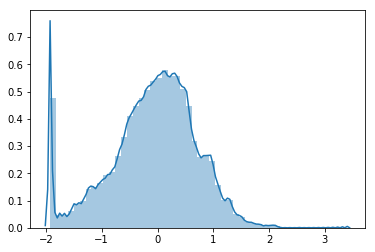

In [23]:
'''Modeling with "Electricity" as target...MODEL 0'''

target_meter = 0
X_train, y_train = create_X_y(train, target_meter=target_meter)
y_valid_pred_total = np.zeros(X_train.shape[0])
gc.collect()
print('target_meter', target_meter, X_train.shape)

cat_features = [X_train.columns.get_loc(cat_col) for cat_col in category_cols]
print('cat_features', cat_features)

models0 = []
for train_idx, valid_idx in kf.split(X_train, y_train):
    train_data = X_train.iloc[train_idx,:], y_train[train_idx]
    valid_data = X_train.iloc[valid_idx,:], y_train[valid_idx]

    print('train', len(train_idx), 'valid', len(valid_idx))
#     model, y_pred_valid, log = fit_cb(train_data, valid_data, cat_features=cat_features, devices=[0,])
    model, y_pred_valid, log = fit_lgbm(train_data, valid_data, cat_features=category_cols,
                                        num_rounds=1000, lr=0.05, bf=0.7)
    y_valid_pred_total[valid_idx] = y_pred_valid
    models0.append(model)
    gc.collect()
    if model.best_score:
        break

sns.distplot(y_train)
del X_train, y_train
gc.collect()

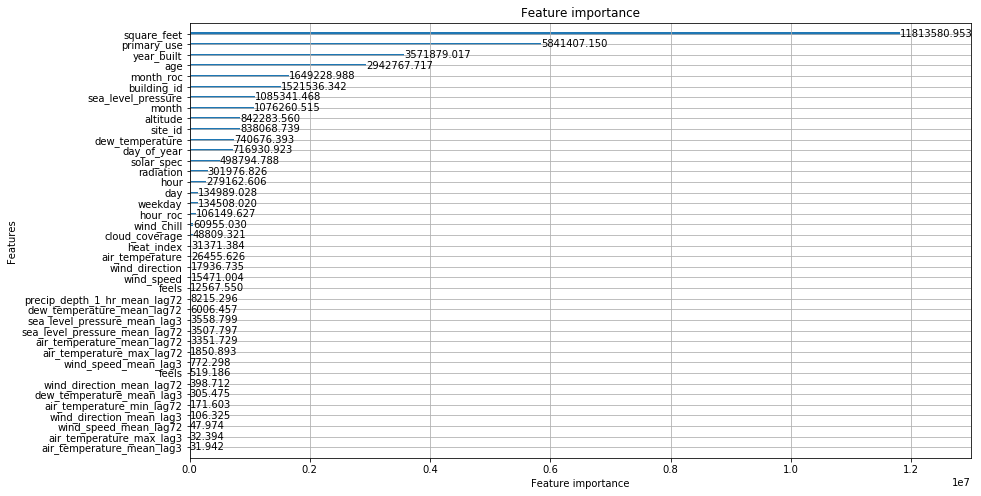

In [31]:
lgb.plot_importance(models0[0], importance_type='gain',figsize=(14,8))

target_meter 1 (4182440, 43)
cat_features [40, 41, 42]
train 3345952 valid 836488
training LGB:
Training until validation scores don't improve for 20 rounds
[20]	training's l2: 0.920143	valid_1's l2: 1.06799
[40]	training's l2: 0.780186	valid_1's l2: 0.904459
[60]	training's l2: 0.703417	valid_1's l2: 0.846613
[80]	training's l2: 0.646734	valid_1's l2: 0.794106
[100]	training's l2: 0.605047	valid_1's l2: 0.763737
[120]	training's l2: 0.573044	valid_1's l2: 0.736392
[140]	training's l2: 0.548361	valid_1's l2: 0.720584
[160]	training's l2: 0.526421	valid_1's l2: 0.701861
[180]	training's l2: 0.507725	valid_1's l2: 0.689676
[200]	training's l2: 0.488213	valid_1's l2: 0.673749
[220]	training's l2: 0.472352	valid_1's l2: 0.667437
[240]	training's l2: 0.454727	valid_1's l2: 0.654482
[260]	training's l2: 0.442013	valid_1's l2: 0.640506
[280]	training's l2: 0.428207	valid_1's l2: 0.629148
[300]	training's l2: 0.416437	valid_1's l2: 0.617792
[320]	training's l2: 0.406483	valid_1's l2: 0.607281


10

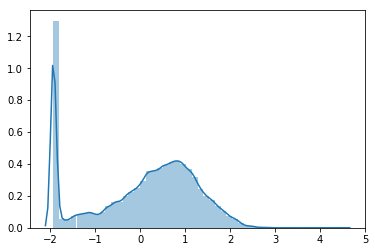

In [32]:
'''Modeling with "ChilledWater" as target...MODEL 1'''

target_meter = 1
X_train, y_train = create_X_y(train, target_meter=target_meter)
y_valid_pred_total = np.zeros(X_train.shape[0])
gc.collect()
print('target_meter', target_meter, X_train.shape)

cat_features = [X_train.columns.get_loc(cat_col) for cat_col in category_cols]
print('cat_features', cat_features)

models1 = []
for train_idx, valid_idx in kf.split(X_train, y_train):
    train_data = X_train.iloc[train_idx,:], y_train[train_idx]
    valid_data = X_train.iloc[valid_idx,:], y_train[valid_idx]

    print('train', len(train_idx), 'valid', len(valid_idx))
#     model, y_pred_valid, log = fit_cb(train_data, valid_data, cat_features=cat_features, devices=[0,])
    model, y_pred_valid, log = fit_lgbm(train_data, valid_data, cat_features=category_cols, num_rounds=1000,
                                       lr=0.05, bf=0.5)
    y_valid_pred_total[valid_idx] = y_pred_valid
    models1.append(model)
    gc.collect()
    if model.best_score:
        break

sns.distplot(y_train)
del X_train, y_train
gc.collect()

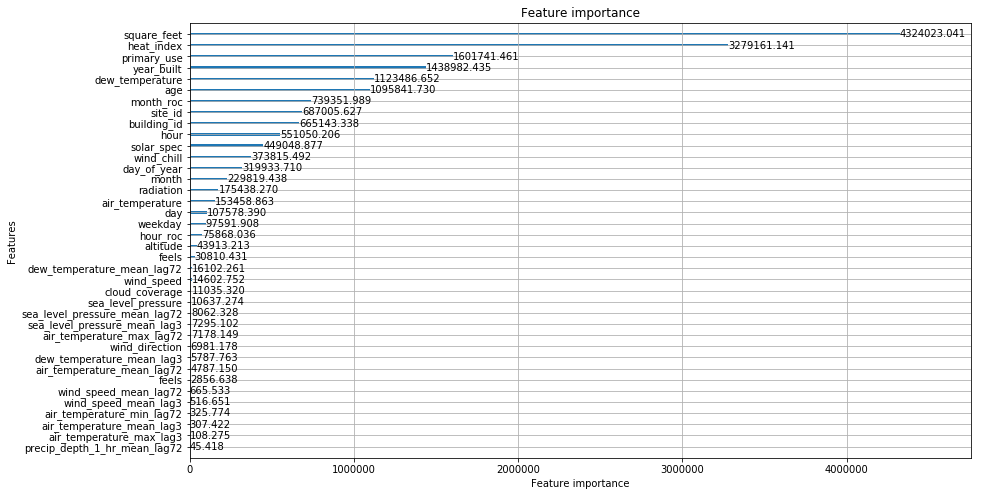

In [33]:
lgb.plot_importance(models1[0], importance_type='gain',figsize=(14,8))

target_meter 2 (1264037, 43)
cat_features [40, 41, 42]
train 1011229 valid 252808
training LGB:
Training until validation scores don't improve for 20 rounds
[20]	training's l2: 0.840819	valid_1's l2: 1.01224
[40]	training's l2: 0.652112	valid_1's l2: 0.863336
[60]	training's l2: 0.558828	valid_1's l2: 0.791324
[80]	training's l2: 0.50184	valid_1's l2: 0.752373
[100]	training's l2: 0.465284	valid_1's l2: 0.717073
[120]	training's l2: 0.438035	valid_1's l2: 0.692392
[140]	training's l2: 0.420552	valid_1's l2: 0.688859
[160]	training's l2: 0.406301	valid_1's l2: 0.682813
[180]	training's l2: 0.391196	valid_1's l2: 0.672477
[200]	training's l2: 0.381146	valid_1's l2: 0.66587
[220]	training's l2: 0.370388	valid_1's l2: 0.656887
[240]	training's l2: 0.362238	valid_1's l2: 0.656439
[260]	training's l2: 0.353503	valid_1's l2: 0.651527
[280]	training's l2: 0.34753	valid_1's l2: 0.653982
Early stopping, best iteration is:
[268]	training's l2: 0.35056	valid_1's l2: 0.649404
best_score defaultdict

10

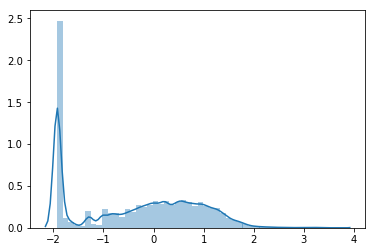

In [34]:
'''Modeling with "Steam" as target...MODEL 2'''

target_meter = 2
X_train, y_train = create_X_y(train, target_meter=target_meter)
y_valid_pred_total = np.zeros(X_train.shape[0])

gc.collect()
print('target_meter', target_meter, X_train.shape)

cat_features = [X_train.columns.get_loc(cat_col) for cat_col in category_cols]
print('cat_features', cat_features)

models2 = []
for train_idx, valid_idx in kf.split(X_train, y_train):
    train_data = X_train.iloc[train_idx,:], y_train[train_idx]
    valid_data = X_train.iloc[valid_idx,:], y_train[valid_idx]

    print('train', len(train_idx), 'valid', len(valid_idx))
#     model, y_pred_valid, log = fit_cb(train_data, valid_data, cat_features=cat_features, devices=[0,])
    model, y_pred_valid, log = fit_lgbm(train_data, valid_data, cat_features=category_cols,
                                        num_rounds=1000, lr=0.05, bf=0.8)
    y_valid_pred_total[valid_idx] = y_pred_valid
    models2.append(model)
    gc.collect()
    if model.best_score:
        break

sns.distplot(y_train)
del X_train, y_train
gc.collect()

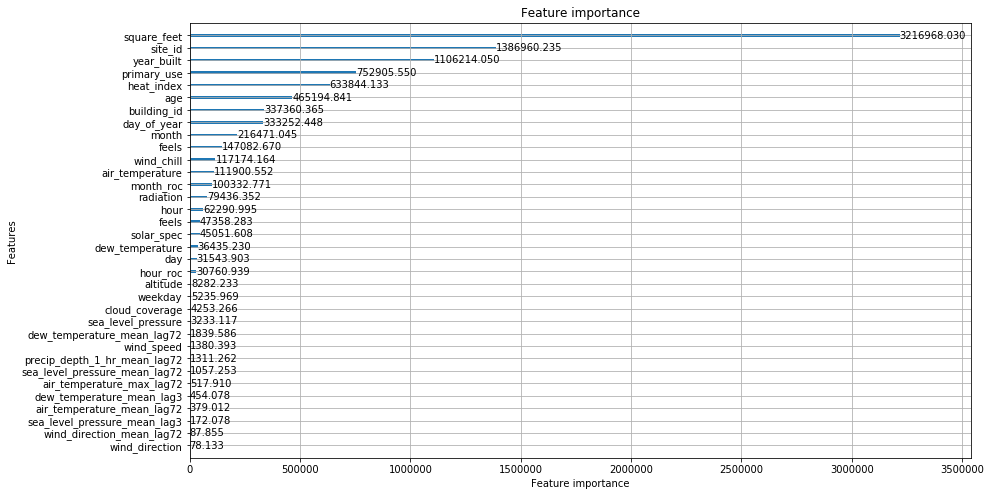

In [35]:
lgb.plot_importance(models2[0], importance_type='gain',figsize=(14,8))

target_meter 3 (2708713, 43)
cat_features [40, 41, 42]
train 2166970 valid 541743
training LGB:
Training until validation scores don't improve for 20 rounds
[20]	training's l2: 1.2007	valid_1's l2: 1.19765
[40]	training's l2: 1.0377	valid_1's l2: 1.07136
[60]	training's l2: 0.936517	valid_1's l2: 1.01482
[80]	training's l2: 0.863886	valid_1's l2: 0.952522
[100]	training's l2: 0.797836	valid_1's l2: 0.901646
[120]	training's l2: 0.732107	valid_1's l2: 0.851114
[140]	training's l2: 0.687273	valid_1's l2: 0.813312
[160]	training's l2: 0.652506	valid_1's l2: 0.780932
[180]	training's l2: 0.621338	valid_1's l2: 0.750288
[200]	training's l2: 0.593712	valid_1's l2: 0.727125
[220]	training's l2: 0.56798	valid_1's l2: 0.702855
[240]	training's l2: 0.545446	valid_1's l2: 0.684205
[260]	training's l2: 0.526055	valid_1's l2: 0.667381
[280]	training's l2: 0.510586	valid_1's l2: 0.657325
[300]	training's l2: 0.492637	valid_1's l2: 0.645902
[320]	training's l2: 0.479112	valid_1's l2: 0.636155
[340]	t

10

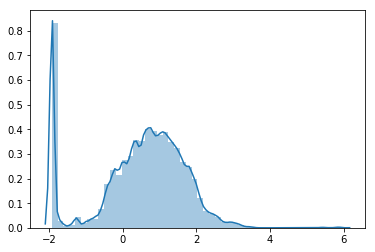

In [36]:
'''Modeling with "HotWater" as target...MODEL 3'''

target_meter = 3
X_train, y_train = create_X_y(train, target_meter=target_meter)
y_valid_pred_total = np.zeros(X_train.shape[0])

gc.collect()
print('target_meter', target_meter, X_train.shape)

cat_features = [X_train.columns.get_loc(cat_col) for cat_col in category_cols]
print('cat_features', cat_features)

models3 = []
for train_idx, valid_idx in kf.split(X_train, y_train):
    train_data = X_train.iloc[train_idx,:], y_train[train_idx]
    valid_data = X_train.iloc[valid_idx,:], y_train[valid_idx]

    print('train', len(train_idx), 'valid', len(valid_idx))
#     model, y_pred_valid, log = fit_cb(train_data, valid_data, cat_features=cat_features, devices=[0,])
    model, y_pred_valid, log = fit_lgbm(train_data, valid_data, cat_features=category_cols, num_rounds=1000,
                                       lr=0.03, bf=0.9)
    y_valid_pred_total[valid_idx] = y_pred_valid
    models3.append(model)
    gc.collect()
    if model.best_score:
        break

sns.distplot(y_train)
del X_train, y_train
gc.collect()

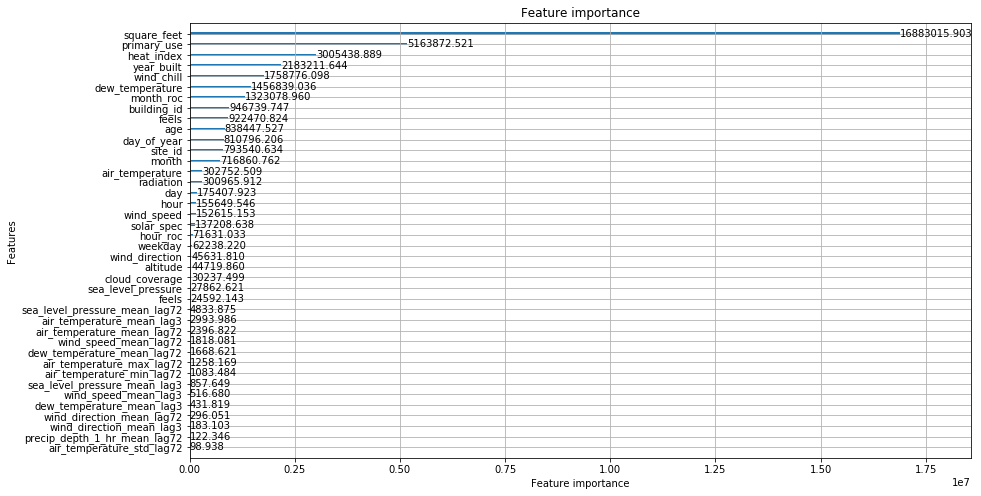

In [37]:
lgb.plot_importance(models3[0], importance_type='gain',figsize=(14,8))

###### As desired, all of the following columns are consistently more important than our 'random' feature. Our rate of change variables also shows consistent importance across all models, particularly the 'month_roc' which was above the 75th percentile in each model. Our lag values turned out to be less important than most of our other features but, nonetheless, still added some value. Hence, we will preserve them till we test their feature importance with other gradient boosting models.